# A4

**Data Visualization I**

1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
   
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

**Link of Dataset (Titanic):**

https://www.kaggle.com/datasets/yasserh/titanic-dataset

**1) Import Required Libraries**

pandas → data handling

matplotlib & seaborn → graphs/plots

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2) Load the Dataset**

In [37]:
# Load the Titanic dataset
df = pd.read_csv("titanic.csv")

In [38]:
# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3) Understand Dataset Structure**

In [39]:
# Dimensions of dataset
df.shape

(891, 12)

**Column Description**

| Column       | Description |
|--------------|-------------|
| PassengerId  | Unique ID of passenger |
| Survived     | Survival status (0 = No, 1 = Yes) |
| Pclass       | Passenger class (1 = Upper, 2 = Middle, 3 = Lower) |
| Name         | Name of passenger |
| Sex          | Gender |
| Age          | Age in years |
| SibSp        | No. of siblings/spouses aboard |
| Parch        | No. of parents/children aboard |
| Ticket       | Ticket number |
| Fare         | Passenger fare |
| Cabin        | Cabin number |
| Embarked     | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |


In [40]:
# Datatypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
# Display info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
# Display statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4) Check for missing values**

In [43]:
# Check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
# Percentage of missing values
df.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**5) Handle Missing Values**

In [45]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [46]:
# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [47]:
# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

In [48]:
# Check for missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization

## 1

<h3>Count Plot</h3>

<b>1) Survival Count</b>

**Inference:** Less no. of passengers survived

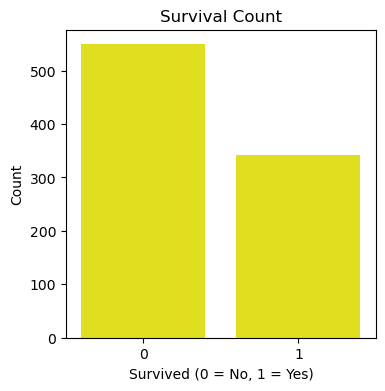

In [49]:
plt.figure(figsize=(4,4))
sns.countplot(x='Survived', data=df, color='yellow')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

**2) Survival by Gender**

**Inference:** More females survived compared to males.

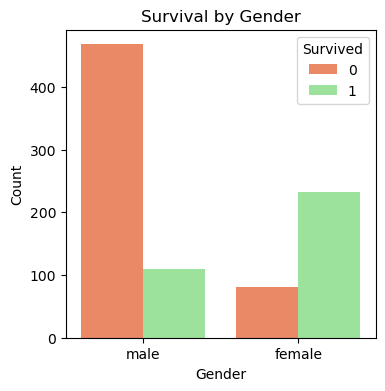

In [50]:
plt.figure(figsize=(4,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette=['coral', 'lightgreen'])
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

**3) Survival by Passenger Class**

**Inference:** Survival chances were high for 1st class

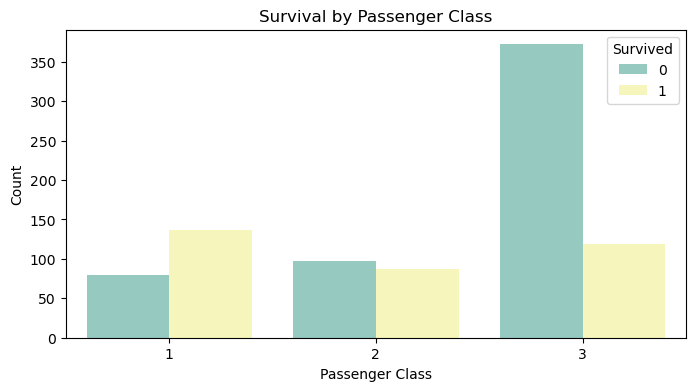

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

**4) ParCh Count**

**Inference:** Most passengers traveled alone (Parch = 0), with fewer having parents/children aboard.

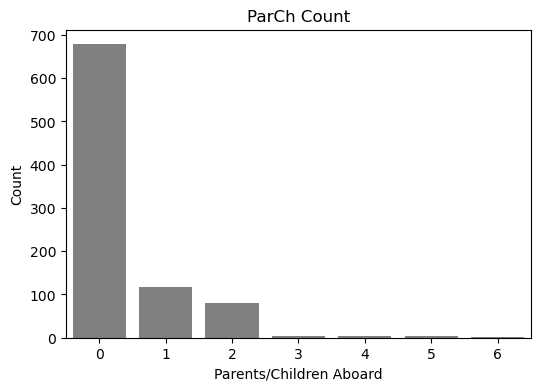

In [52]:
plt.figure(figsize=(6,4))
sns.countplot(x='Parch', data=df, color='grey')
plt.title("ParCh Count")
plt.xlabel("Parents/Children Aboard")
plt.ylabel("Count")
plt.show()

<h3>Bar Plot</h3>

**5) Survival by Port of Embarkation**

(C = Cherbourg, Q = Queenstown, S = Southampton)

**Inference:** Passengers emkarked at C had higer changes of survival and S had less.

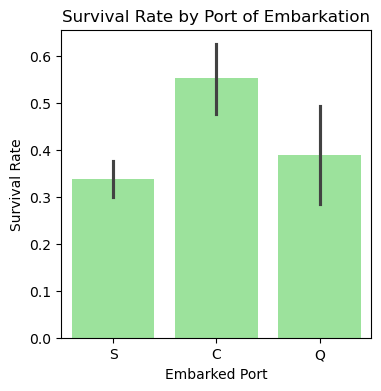

In [53]:
plt.figure(figsize=(4,4))
sns.barplot(x='Embarked', y='Survived', data=df, color='lightgreen')
plt.title("Survival Rate by Port of Embarkation")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.show()

**6) Survival Rate by ParCh**

**Inference:** Passengers with 3 parch aboard had higher survival rate compared to others, while with 5 had lowest.

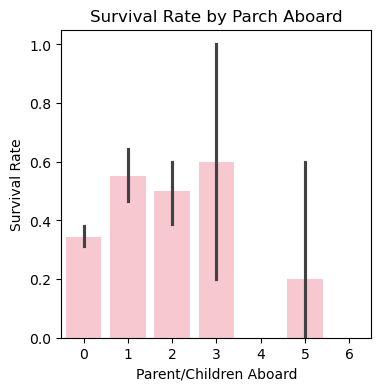

In [54]:
plt.figure(figsize=(4,4))
sns.barplot(x='Parch', y='Survived', data=df, color='pink')
plt.title("Survival Rate by Parch Aboard")
plt.xlabel("Parent/Children Aboard")
plt.ylabel("Survival Rate")
plt.show()

 <h3>Scatter Plot</h3>

**7) Age vs Fare with Survival**

**Inference:** Higher-fare passengers and young children were more likely to survive.

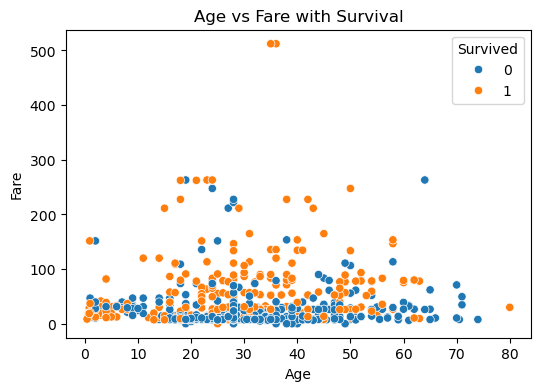

In [55]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare with Survival")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

<h3>KDE Plot</h3>

**8) Distribution of SibSp by Survival**

**Inference:** Most passengers traveled alone, and survival was higher among those with fewer or no siblings/spouses aboard.

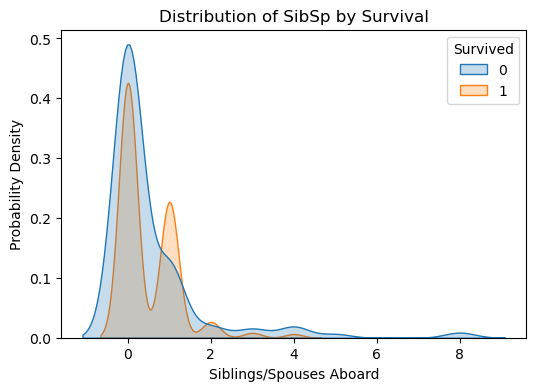

In [56]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='SibSp', hue='Survived', fill=True)
plt.title("Distribution of SibSp by Survival")
plt.xlabel("Siblings/Spouses Aboard")
plt.ylabel("Probability Density")
plt.show()

<h3>Line Plot</h3>

**9) Survival Rate by Age Group**

**Inference**: Children and teens had higher survival rates compared to adults and seniors.

In [57]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [58]:
# Calculate survival rate per age group
age_survival = df.groupby("AgeGroup", observed=True)["Survived"].mean().reset_index()

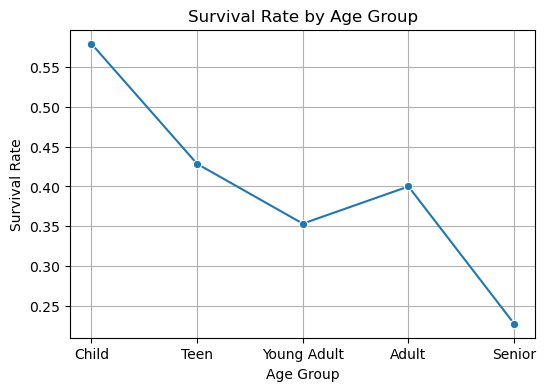

In [59]:
# Seaborn line plot
plt.figure(figsize=(6,4))
sns.lineplot(data=age_survival, x='AgeGroup', y='Survived', marker='o')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.grid(True)
plt.show()

## 2

<h3>Histogram</h3>

**10) Distribution of Ticket Fare**

**Inference:** Most passengers paid lower fares, and only a few paid very high fares.

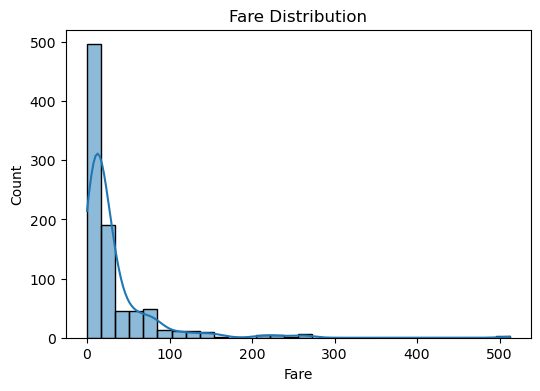

In [60]:
# Fare distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

**11) Age Distribution**

**Inference:** Most passengers were between 20 and 40 years old.

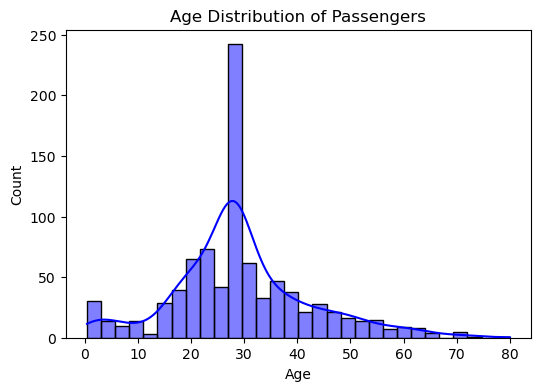

In [61]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()